# 12 Logistic Regression 
## Why not use Linear Regression? 
In a binary classification task we could use 0 and 1 as the labels and use Linear Regression... 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

bikes_df = pd.read_csv('bike_sharing.csv')

bikes_df.pop('casual')
bikes_df.pop('registered')
bikes_df.pop('instant')
dump = bikes_df.pop('dteday')

Create a low/high classification task on the bikes sharing data.  
- 0: below 4000
- 1: above 4000

In [2]:
y = np.where(bikes_df['count']> 4000, 1, 0)
X_all = bikes_df
bikes_df.pop('count')
True

True

In [3]:
X_all_scal = StandardScaler().fit_transform(X_all)
SGD_all = SGDRegressor(max_iter=50, tol=1e-3).fit(X_all_scal, y)

In [4]:
linR_pred = SGD_all.predict(X_all_scal)
bikes_df['Lin Reg']=linR_pred
bikes_df['class']=y

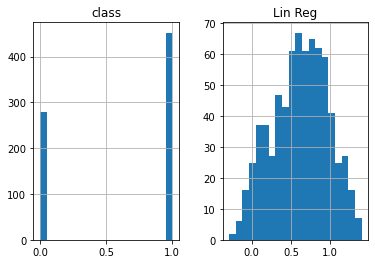

In [5]:
hist = bikes_df[['class','Lin Reg']].hist(bins=20)

Some Linear Regression predictions are outside the range 0,1

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
LR = LogisticRegression(random_state=0).fit(X_all_scal, y)
logR_pred = LR.predict_proba(X_all_scal)[:,1]
bikes_df['Log Reg']=logR_pred

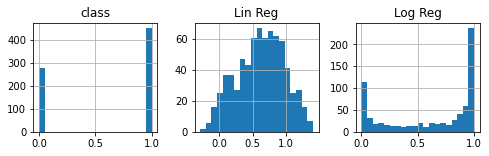

In [8]:
hist = bikes_df[['class','Lin Reg', 'Log Reg']].hist(bins=20, 
                                                     layout = (1,3), figsize = (8,2))

## Coefficients
A model with just 4 features

In [9]:
bikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'Lin Reg', 'class',
       'Log Reg'],
      dtype='object')

In [10]:
bikes4 = bikes_df[['yr','mnth','weekday','temp']]

In [11]:
bikes4.head()

,yr,mnth,weekday,temp
0,0,1,6,0.344167
1,0,1,0,0.363478
2,0,1,1,0.196364
3,0,1,2,0.200000
4,0,1,3,0.226957


Data not normalised

In [12]:
from sklearn.linear_model import LogisticRegression
LR4 = LogisticRegression(random_state=0).fit(bikes4, y)
print('Accuracy \t %2.2f' %(LR4.score(bikes4, y)))
for name, indx in zip(bikes4.columns, range(4)):
    print('%s\t %2.2f' % (name, LR4.coef_[0][indx]))
print('Intercept \t %2.2f' % (LR4.intercept_[0]))

Accuracy 	 0.86
yr	 2.24
mnth	 0.10
weekday	 0.07
temp	 7.59
Intercept 	 -5.03


Data normalised

In [13]:
bikes4_scal = StandardScaler().fit_transform(bikes4)
LR4s = LogisticRegression(random_state=0).fit(bikes4_scal, y)
print('Accuracy \t %2.2f' %(LR4s.score(bikes4_scal, y)))
for name, indx in zip(bikes4.columns, range(4)):
    print('%s\t %2.2f' % (name, LR4s.coef_[0][indx]))
print('Intercept \t %2.2f' % (LR4s.intercept_[0]))

Accuracy 	 0.86
yr	 1.51
mnth	 0.38
weekday	 0.21
temp	 2.25
Intercept 	 0.95
